# Loading Images

In [0]:
# downloading the zip files

!wget "https://drive.google.com/uc?export=download&id=1fPMgeDlA8dB_GLPPEPeppEQwsAJOuGlD" -O test.zip -q

In [0]:
# remove previous dirs if is the case
!rm -rdf test

In [0]:
# unzipping test images
!unzip -qq test.zip -d test

In [3]:
# checking number of files
!ls -1 test | wc -l

5361


# Loading Predictions

In [0]:
# downloading the csv preds file

!wget "https://drive.google.com/uc?export=download&id=16RMkZ9ciQOKDOkPFsx9Q_ObV68yMnDTx" -O test.preds.csv -q

In [0]:
import pandas as pd

In [0]:
predictions = pd.read_csv('test.preds.csv')

In [6]:
predictions.head()

,fn,label
0,98-16314398_1984-08-21_2014.jpg,rotated_left
1,91-24815391_1964-04-08_1997.jpg,upright
2,95-142695_1973-06-20_2014.jpg,upside_down
3,94-23982794_1978-04-19_2014.jpg,upside_down
4,97-11838797_1979-10-18_2007.jpg,upside_down


# Functions

In [0]:
import cv2

from google.colab.patches import cv2_imshow

In [0]:
def rotate(fp, to=None, save=True, show=False):
    
    # reading the image
    img = cv2.imread(fp, 1)
    
    # do not rotate the image
    if to == None:
        
        pass
    
    else:
    
        # angle to rotate the image
        if to == 'left':
            angle = 90
        if to == 'right':
            angle = -90
        if to == 'upside':
            angle = 180

        # dimensions of the image
        rows,cols = img.shape[:2]

        # rotation matrix
        M = cv2.getRotationMatrix2D( ( cols/2 , rows/2 ) , angle , 1 )

        # appling the rotation matrix
        img = cv2.warpAffine( img , M , ( cols , rows ) )
    
    # checking the result
    if show :
        cv2_imshow(img)
    
    # save to a png file
    if save :
        fp = fp.replace('.jpg','.png').replace('test','png')
        cv2.imwrite(fp, img)

# Applying Corrections

In [0]:
# remove previous dirs if is the case
!rm -rdf png

# creating a new output dir
!mkdir png

In [0]:
for index, item in predictions.iterrows():
    
    # path to the image
    fp = 'test/' + item.fn
    
    # default rotation option
    to = None
    
    if(item.label == 'rotated_left'):
        to = 'right'
    
    if(item.label == 'rotated_right'):
        to = 'left'
    
    if(item.label == 'upside_down'):
        to = 'upside'
    
    # calling the rotation function
    rotate(fp, to)

In [11]:
# checking png files produced
!ls -1 png/ | wc -l

5361


In [0]:
# saving the corrected images to a zip file
!rm -rdf test_corrections.zip

!zip -r test_corrections.zip png -q

# Numpy Output

In [0]:
import os
import numpy as np

# loads images from a folder to a numpy ndarray
def load_images_from_folder(target):
    
    images = []
    fnames = []
    
    for fn in os.listdir(target) :
        
        fnames.append(fn)
    
        fp = target + '/{0}'.format(fn)

        img = cv2.imread(fp, 1)

        images.append(img)
        
    images = np.asarray(images)
    fnames = np.asarray(fnames)
    
    return images, fnames

In [0]:
# loading the desired numpy output
npo, _ = load_images_from_folder('png')

In [15]:
# checking dimensions
npo.shape

(5361, 64, 64, 3)

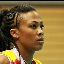

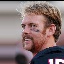

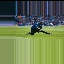

In [16]:
# showing some of the images
for img in npo[:3]:
    
    cv2_imshow(img)

In [0]:
# saving numpy file
np.save('npo', npo)

In [18]:
# just checking a load
np.load('npo.npy').shape

(5361, 64, 64, 3)